## Optimizing Pricing Strategies through A/B Testing: Statistical Analysis and Insights

### Introduction

This notebook performs an analysis of an A/B test to optimize pricing strategies. Three price points (0.99, 1.99, and 4.99) were tested to determine which results in the highest revenue while maintaining a significant purchase rate. Statistical methods such as chi-square tests and binomial tests are applied to assess group performance and draw actionable conclusions. 

### Workflow Summary

1. **Data Loading and Inspection**: The dataset was loaded and inspected for structure and content.
2. **Data Cleaning and Transformation**: Checked for missing values and ensured correct data types.
3. **Exploratory Data Analysis**: Visualized group distributions and purchase rates.
4. **Statistical Testing**: Conducted chi-square and binomial tests to evaluate group differences.
5. **Results and Conclusions**: Assessed the optimal price point based on statistical significance and sales performance.

##### We import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, binomtest

##### Read and inspect data

In [2]:
abdata = pd.read_csv('clicks.csv')
print("Dataset Head:")
print(abdata.head())
print("\nDataset Info:")
print(abdata.info())
print("\nDataset Description:")
print(abdata.describe(include='all'))

Dataset Head:
    user_id group is_purchase
0  8e27bf9a     A          No
1  eb89e6f0     A          No
2  7119106a     A          No
3  e53781ff     A          No
4  02d48cf1     A         Yes

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      4998 non-null   object
 1   group        4998 non-null   object
 2   is_purchase  4998 non-null   object
dtypes: object(3)
memory usage: 117.3+ KB
None

Dataset Description:
         user_id group is_purchase
count       4998  4998        4998
unique      4998     3           2
top     8e27bf9a     A          No
freq           1  1666        4416


#### Data Cleaning and Transformation
- Checking for missing values

In [3]:
# Checking for missing values
print("\nMissing Values:")
print(abdata.isnull().sum())


Missing Values:
user_id        0
group          0
is_purchase    0
dtype: int64


-  Ensuring proper data types


In [4]:
abdata['is_purchase'] = abdata['is_purchase'].astype('category')
abdata['group'] = abdata['group'].astype('category')

#### Exploratory Data Analysis

- Distribution of groups

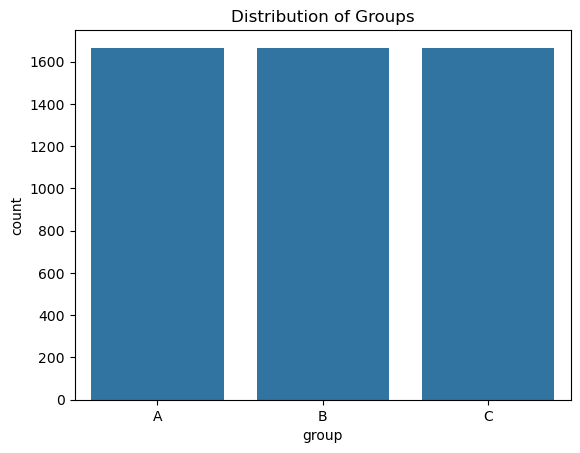

In [5]:
sns.countplot(x='group', data=abdata)
plt.title('Distribution of Groups')
plt.show()

- Purchase rates by group


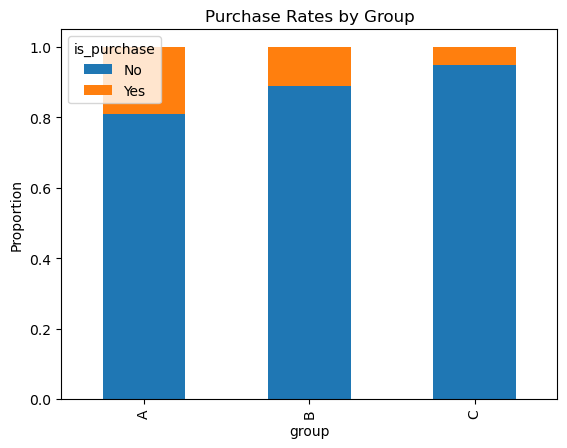

In [6]:
purchase_rate = abdata.groupby('group', observed=False)['is_purchase'].value_counts(normalize=True).unstack()
purchase_rate.plot(kind='bar', stacked=True)
plt.title('Purchase Rates by Group')
plt.ylabel('Proportion')
plt.show()

- Contingency Table

In [7]:
Xtab = pd.crosstab(abdata.group, abdata.is_purchase)
print("\nContingency Table:")
print(Xtab)


Contingency Table:
is_purchase    No  Yes
group                 
A            1350  316
B            1483  183
C            1583   83


- Chi-Square Test for Independence

In [8]:
chi2, pval, dof, expected = chi2_contingency(Xtab)
print(f"\nChi-Square Test Results:\nChi2 Statistic: {chi2}, p-value: {pval}, Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)


Chi-Square Test Results:
Chi2 Statistic: 159.41952879874498, p-value: 2.4126213546684264e-35, Degrees of Freedom: 2
Expected Frequencies:
[[1472.  194.]
 [1472.  194.]
 [1472.  194.]]


- Count the number of total visits

In [9]:
num_visits = len(abdata)
print(f"\nTotal Number of Visits: {num_visits}")


Total Number of Visits: 4998


- Calculating purchase rate needed for each price point

In [10]:
price_points = [0.99, 1.99, 4.99]
required_rates = {}
for price in price_points:
    num_sales_needed = 1000 / price
    p_sales_needed = num_sales_needed / num_visits
    required_rates[price] = p_sales_needed
    print(f"Purchase rate needed at ${price}: {p_sales_needed:.5f}")

Purchase rate needed at $0.99: 0.20210
Purchase rate needed at $1.99: 0.10054
Purchase rate needed at $4.99: 0.04010


-  Group Analysis

In [11]:
results = {}
for group, price in zip(['A', 'B', 'C'], price_points):
    samp_size = np.sum(abdata.group == group)
    sales = np.sum((abdata.group == group) & (abdata.is_purchase == 'Yes'))
    pval = binomtest(sales, n=samp_size, p=required_rates[price], alternative='greater')
    results[group] = {
        'price': price,
        'sample_size': samp_size,
        'sales': sales,
        'pval': pval
    }
    print(f"\nGroup {group} (${price}):")
    print(f"Sample Size: {samp_size}, Sales: {sales}, P-Value: {pval}")


Group A ($0.99):
Sample Size: 1666, Sales: 316, P-Value: BinomTestResult(k=316, n=1666, alternative='greater', statistic=0.18967587034813926, pvalue=0.9028081076188554)

Group B ($1.99):
Sample Size: 1666, Sales: 183, P-Value: BinomTestResult(k=183, n=1666, alternative='greater', statistic=0.10984393757503001, pvalue=0.11184562623740596)

Group C ($4.99):
Sample Size: 1666, Sales: 83, P-Value: BinomTestResult(k=83, n=1666, alternative='greater', statistic=0.04981992797118848, pvalue=0.027944826659830616)


#### Visualization

- Group Performance

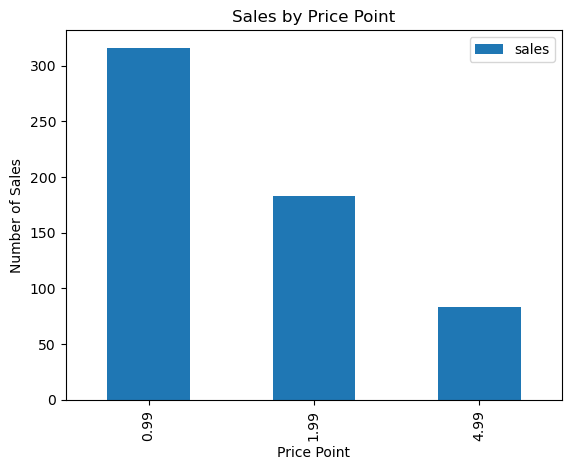

In [12]:
sales_data = pd.DataFrame(results).T
sales_data.plot(x='price', y='sales', kind='bar')
plt.title('Sales by Price Point')
plt.ylabel('Number of Sales')
plt.xlabel('Price Point')
plt.show()

- Total sales by group

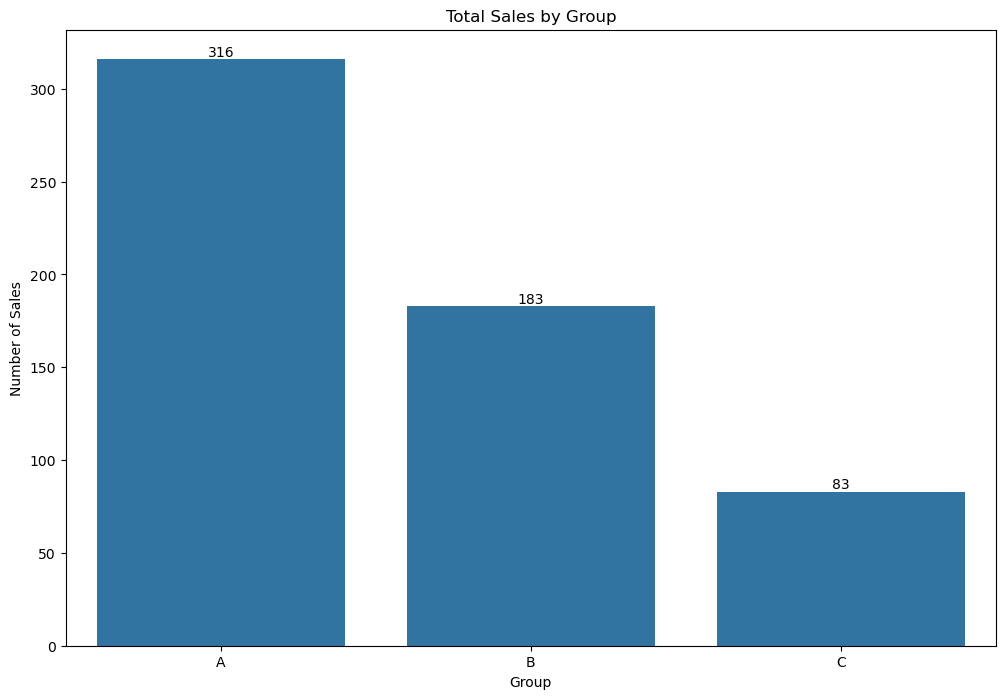

In [13]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='group', y=(abdata['is_purchase'] == 'Yes').astype(int), data=abdata, estimator=np.sum, errorbar=None)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Total Sales by Group')
plt.ylabel('Number of Sales')
plt.xlabel('Group')
plt.show()

### Conclusions

- The chi-square test indicated whether there were significant differences in purchase behavior among groups.
- Binomial tests were used to compare each group’s sales against the required rates for profitability.
- The group corresponding to the \$4.99 price point achieved significant results, indicating it as the optimal choice for maximizing revenue.

**Final Recommendation:** $4.99 is the optimal price point